In [1]:
import pandas as pd
import numpy as np

In [28]:
col_names=['user_id','item_id','Ratings','Timestamp']
movies=pd.read_table(r'C:\Users\Dipika\Downloads\ml-100k\ml-100k\u.data',sep='\t',header=None,names=col_names)
movies.head()
print(movies.shape)
print(movies['item_id'].nunique())

(100000, 4)
1682


In [29]:
movie_title=pd.read_csv(r'C:\Users\Dipika\Downloads\ml-100k\ml-100k\u.item',sep='\|',header=None)
movie_title.iloc[:,1].shape

C:\Users\Dipika\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


(1682,)

In [30]:
movie_title=movie_title[[0,1]]
#column=['item_id','Movie_title']
movie_title.columns=['item_id','Movie_title']

In [32]:
data=pd.merge(movies,movie_title,on='item_id')
data.head()
data.shape

(100000, 5)

In [34]:
data.head()

,user_id,item_id,Ratings,Timestamp,Movie_title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [39]:
ratings=pd.DataFrame(data.groupby('Movie_title')['Ratings'].mean())
ratings['No. of Ratings']=pd.DataFrame(data.groupby('Movie_title')['Ratings'].count())
ratings.head()

,Ratings,No. of Ratings
Movie_title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
#style : dict, None, or one of {darkgrid, whitegrid, dark, white, ticks}
sns.set_style('darkgrid')

C:\Users\Dipika\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


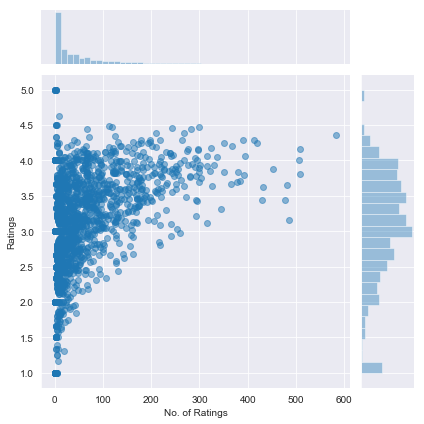

In [48]:
sns.jointplot(x=ratings['No. of Ratings'],y=ratings['Ratings'],alpha=0.5)

In [49]:
ratings.corr()
data.columns

Index(['user_id', 'item_id', 'Ratings', 'Timestamp', 'Movie_title'], dtype='object')

In [76]:
import warnings
warnings.filterwarnings('ignore')
def Recommend_Movies(Movie_name):
    movie_mat=data.pivot_table(index='user_id',columns='Movie_title',values='Ratings')
    user_rating_for_movie=movie_mat[Movie_name]
    #print(user_rating_for_movie)
    similar_to_movie=movie_mat.corrwith(user_rating_for_movie)
    correlated_movies=pd.DataFrame(similar_to_movie,columns=['correlation'])
    correlated_movies=correlated_movies.dropna()
    correlated_movies=correlated_movies.join(ratings['No. of Ratings'])
    correlated_movies=correlated_movies[(correlated_movies['No. of Ratings']>100) &
                 (correlated_movies['correlation']>0.3)].sort_values('correlation',ascending=False)
    return correlated_movies

In [77]:
Recommend_Movies('Crash (1996)')

,correlation,No. of Ratings
Movie_title,,
Crash (1996),1.000000,128
Down Periscope (1996),0.737162,101
"Sex, Lies, and Videotape (1989)",0.664509,101
Monty Python's Life of Brian (1979),0.651013,174
Happy Gilmore (1996),0.536685,149
On Golden Pond (1981),0.508747,106
Alien: Resurrection (1997),0.495392,124
My Best Friend's Wedding (1997),0.488937,172
North by Northwest (1959),0.482017,179
